### This code is from a YouTube video titled "Beating Nyquist with Compressed Sensing [Python] 
##### by Steve Brunton. [link](https://www.youtube.com/watch?v=5-LY6wBIKx8&list=PLMrJAkhIeNNRHP5UA-gIimsXLQyHXxRty&index=10)

Jeonghyeop Kim (12/22/2021)

-------------------------
####  Equal Sampling = True 
####  Random Sampling = False

In [1]:
equal_sampling=False

## 1. Import modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy.fftpack import dct, idct
from scipy.optimize import minimize
sys.path.append(os.path.join(sys.path[0],'CoSaMP'))
from cosamp import cosamp
# cosamp. function is available at:
# https://github.com/avirmaux/CoSaMP

plt.rcParams.update({'font.size' : 18})

## 2. Generate signal, Discrete Cosine Transform (DCT) of signal

In [3]:
n = 4096 # points in high resolution signal
t = np.linspace(0,1,n)
x = np.cos(2*97*np.pi * t) + np.cos(2*777*np.pi*t)
xt = np.fft.fft(x) #Fourier Transformed Signal
PSD = xt * np.conj(xt) / n # Power spectral Density

## 3. Sample signal

In [4]:
p = 128 # num. random samples, p = n/32
perm = np.floor(np.random.rand(p)*n).astype(int)
if equal_sampling:
    perm = np.arange(0,n,32)
y = x[perm]

## 4. Plot signal and sampling points

/Users/jkim/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


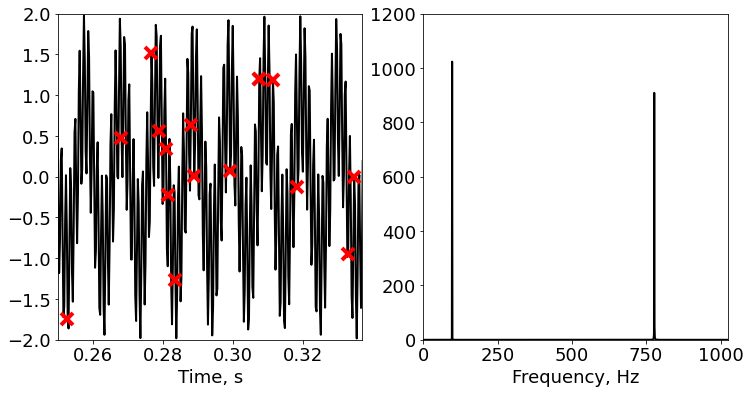

In [5]:
time_window = np.array([1024,1380])/4096
freq = np.arange(n)
L = int(np.floor(n/2))
plt.rcParams['figure.figsize'] = [12, 6]
fig,axs=plt.subplots(1,2)
axs=axs.reshape(-1)
axs[1].plot(freq[:L],PSD[:L],color='k',linewidth=2)
axs[1].set_xlim(0,1024)
axs[1].set_ylim(0,1200)
axs[1].set_xlabel('Frequency, Hz')


axs[0].plot(t,x,color='k',linewidth=2)
axs[0].plot(perm/n,y,color='r',marker='x',linewidth=0,ms=12,mew=4)
axs[0].set_xlim(time_window[0],time_window[1])
axs[0].set_ylim(-2,2)
axs[0].set_xlabel('Time, s')
plt.show()

## 5. Solve compressed sensing problem

In [6]:
Psi = dct(np.identity(n)) # Build Psi
Theta = Psi[perm,:] # Measure rows of Psi

s = cosamp(Theta,y,10,epsilon=1.e-10,max_iter=10) #CS 
xrecon = idct(s)

/Users/jkim/main/compressed_sensing_basic/CoSaMP/cosamp.py:24: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


## 6. Plot original signal and reconstructed signal

/Users/jkim/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/jkim/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


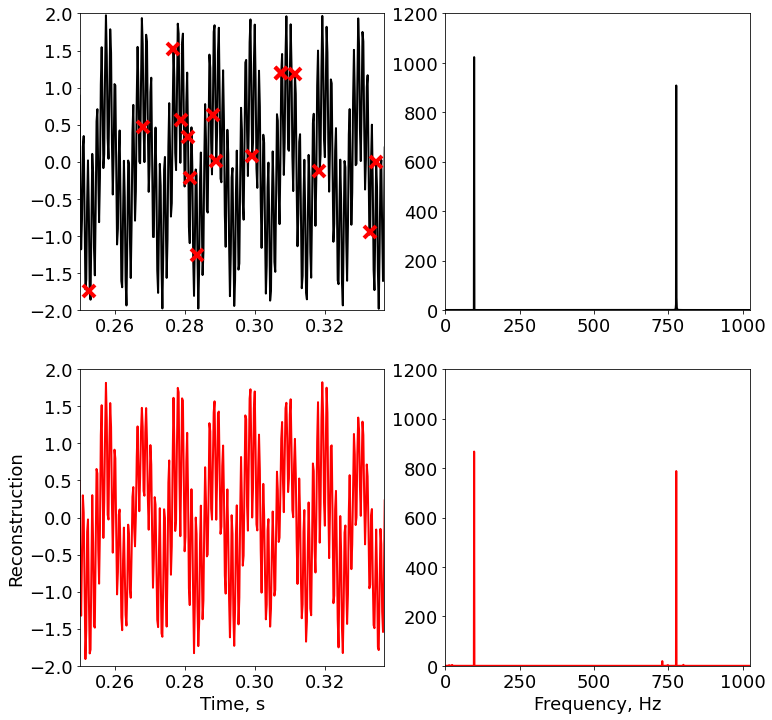

In [7]:
time_window = np.array([1024,1380])/4096
freq = np.arange(n)
L = int(np.floor(n/2))
plt.rcParams['figure.figsize'] = [12, 12]
fig,axs=plt.subplots(2,2)
axs=axs.reshape(-1)
axs[1].plot(freq[:L],PSD[:L],color='k',linewidth=2)
axs[1].set_xlim(0,1024)
axs[1].set_ylim(0,1200)

axs[0].plot(t,x,color='k',linewidth=2)
axs[0].plot(perm/n,y,color='r',marker='x',linewidth=0,ms=12,mew=4)
axs[0].set_xlim(time_window[0],time_window[1])
axs[0].set_ylim(-2,2)

axs[2].plot(t,xrecon,color='r',linewidth=2)
axs[2].set_xlim(time_window[0],time_window[1])
axs[2].set_ylim(-2,2)
axs[2].set_xlabel('Time, s')
axs[2].set_ylabel('Reconstruction')

xtrecon = np.fft.fft(xrecon,n)
PSDrecon = xtrecon * np.conj(xtrecon)/n

axs[3].plot(freq[:L],PSDrecon[:L],color='r',linewidth=2)
axs[3].set_xlim(0,1024)
axs[3].set_ylim(0,1200)
axs[3].set_xlabel('Frequency, Hz')
plt.show()